In [1]:
import MDAnalysis as mda
import ARPDF, utils
import importlib

importlib.reload(ARPDF)
importlib.reload(utils)
from ARPDF import *

In [2]:
u1 = mda.Universe('data/CCl4/CCl4.gro')
u2 = mda.Universe('data/CCl4/CCl4_modified.gro')
modified_atoms = [515, 516, 517, 518, 519, 645]
polar_axis = [0.85692924,0.47545751,0.19902873]
ori_range = 9.924650203173275
X, Y, ARPDF_exp = utils.preprocess_ARPDF(np.load("data/CCl4/ARPDF_exp.npy"), ori_range, rmax=9.0)

Selected 239 atoms for universe 1, 243 atoms for universe 2.
Computing fields of universe 1...
Computed field for C-C: 51 atom pairs.
Computed field for C-CL: 300 atom pairs.
Computed field for CL-CL: 415 atom pairs.
Computing fields of universe 2...
Computed field for C-C: 49 atom pairs.
Computed field for C-CL: 302 atom pairs.
Computed field for CL-CL: 413 atom pairs.


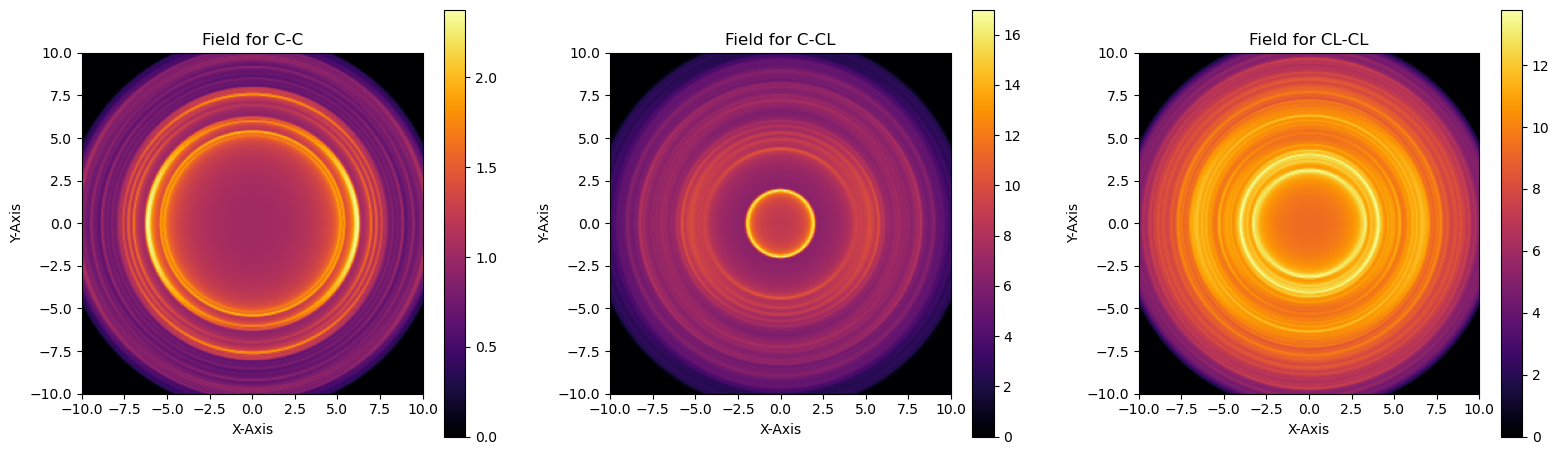

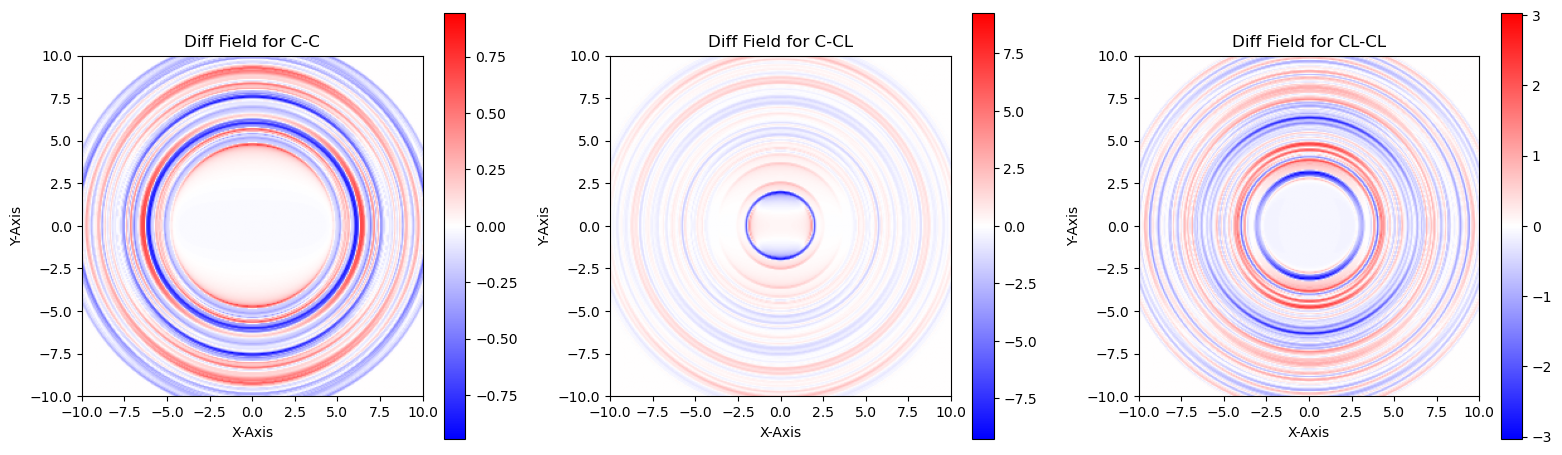

Computing ARPDF...


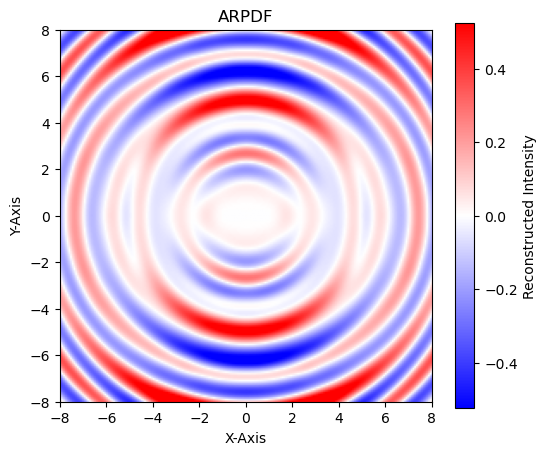

In [3]:
X, Y = utils.to_cupy(X, Y)
ARPDF = compute_ARPDF(u1, u2, cutoff=10.0, N=512, grids_XY=(X, Y), modified_atoms=modified_atoms, 
                        polar_axis=polar_axis, periodic=True, verbose=True, use_cupy=True)

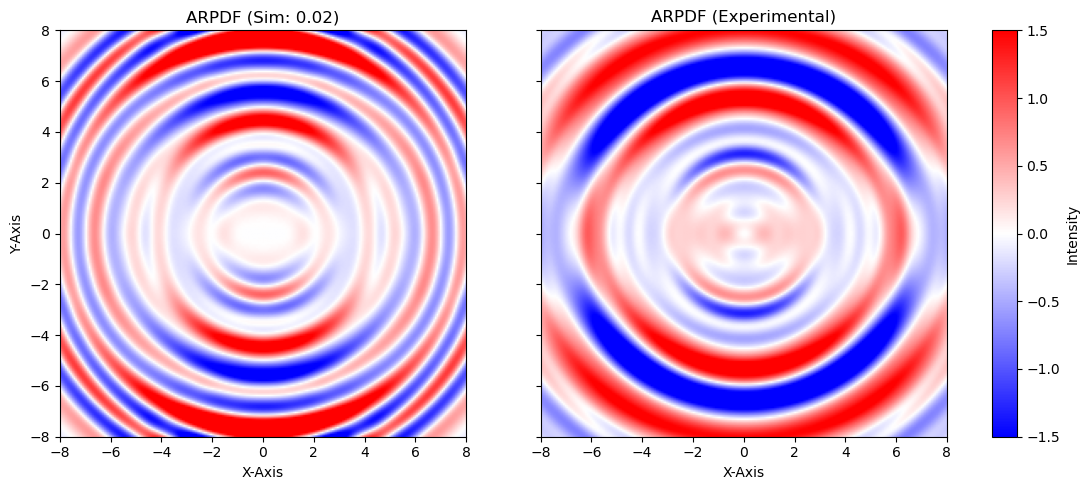

In [ ]:


compare_ARPDF(ARPDF, ARPDF_exp, to_numpy(X, Y), show_range=8.0)

In [5]:
pos1 = u1.atoms[modified_atoms].positions
pos2 = u2.atoms[modified_atoms].positions
_u2 = u2.copy()
ARPDFs = []
for i, t in enumerate(np.linspace(0, 1, 20)):
    _u2.atoms[modified_atoms].positions = pos1 * (1 - t) + pos2 * t
    ARPDFs.append(compute_ARPDF(u1, _u2, cutoff=10.0, N=512, modified_atoms=modified_atoms, polar_axis=polar_axis, periodic=True, verbose=False, use_cupy=True))


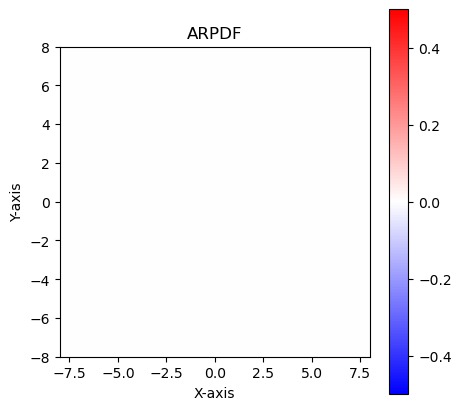

In [6]:
from matplotlib import pyplot as plt, animation
# 创建画布和初始图像
fig, ax = plt.subplots(figsize=(5, 5))
im = ax.imshow(ARPDFs[0], origin="lower", cmap="bwr", extent=[-10, 10, -10, 10])
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_title("ARPDF")
ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)
im.set_clim(-0.5, 0.5)
fig.colorbar(im, ax=ax)


In [7]:

# 更新函数：用于更新每一帧的图像
def update(frame):
    im.set_array(ARPDFs[frame])
    return [im]

# 创建动画 (frames 指定帧数, interval 控制帧间隔时间)
ani = animation.FuncAnimation(fig, update, frames=len(ARPDFs), interval=100, blit=True)

# 显示动画 (仅在 Jupyter Notebook 中运行)
from IPython.display import HTML
HTML(ani.to_jshtml())

In [8]:
ani.save("tmp/ARPDF.gif", writer="pillow", fps=10)

In [9]:
# import time
# start = time.time()
# num_iter = 100
# for _ in range(num_iter):
#     compute_ARPDF(u1, u2, cutoff=10.0, N=512, modified_atoms=modified_atoms, polar_axis=polar_axis, periodic=True, verbose=False, use_cupy=False)
# print("Time for compute_ARPDF:", (time.time() - start) / num_iter)
# start = time.time()
# num_iter = 100
# for _ in range(num_iter):
#     compute_ARPDF(u1, u2, cutoff=10.0, N=512, modified_atoms=modified_atoms, polar_axis=polar_axis, periodic=True, verbose=False, use_cupy=True)
# print("Time for compute_ARPDF:", (time.time() - start) / num_iter)